## Observations and Insights 

In [200]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merged_data.sample(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
953,i635,Propriva,Male,21,26,0,45.000000,0
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1190,m550,Ketapril,Male,18,28,30,60.856543,4
1192,m550,Ketapril,Male,18,28,40,68.210720,4
1167,m133,Naftisol,Female,2,26,15,48.665207,1
1854,y865,Ceftamin,Male,23,26,40,63.469549,3
1104,l471,Ceftamin,Female,7,28,5,46.251872,0
1423,q582,Placebo,Male,5,30,30,52.648894,2
1637,v766,Infubinol,Male,16,27,0,45.000000,0


In [144]:
#  Display the number of unique mice IDs in the data,
numberof_mice = len(merged_data ["Mouse ID"].unique())
print (f"The number of mice in the mouse metadata dataframe is {numberof_mice}")

The number of mice in the mouse metadata dataframe is 249


In [166]:
# check for any mouse ID with duplicate time points 
duplicate_rows = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_id = duplicate_rows["Mouse ID"].unique()
for index, value in enumerate(duplicate_mice_id):
    print(f" There is {len(duplicate_mice_id)} duplicated mouse for <<mouse ID and timepoint>> with the value of {value}")


 There is 1 duplicated mouse for <<mouse ID and timepoint>> with the value of g989


In [175]:
# Display the data associated with that mouse ID
data_dupl_mouse = merged_data.loc[merged_data["Mouse ID"]=="g989"]
print (data_dupl_mouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [201]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
# Ccreate a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining steps.
merged_data_clean = merged_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = 'last')
merged_data_clean.sample(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
871,g296,Zoniferol,Female,14,29,30,57.997706,3
1560,t718,Placebo,Female,10,30,40,61.530399,3
605,b559,Naftisol,Male,20,26,20,55.654456,1
1036,k382,Ketapril,Male,22,29,10,50.180968,1
1627,v603,Ketapril,Female,22,30,35,63.189432,1
1863,z581,Infubinol,Female,24,25,0,45.000000,0
513,a457,Ketapril,Female,11,30,10,49.783419,0
1629,v719,Infubinol,Female,17,30,5,47.188363,0
221,w914,Capomulin,Male,24,21,30,40.993110,0
887,g558,Propriva,Male,8,29,10,50.094754,0


In [121]:
# Checking the number of mice in the clean DataFrame.
merged_mice = pd.DataFrame (merged_data_clean ["Mouse ID"])
merged_mice_count= len(merged_mice["Mouse ID"].unique())
print (f"The number of mice in the merged datafile is {merged_mice_count}")

The number of mice in the merged datafile is 249


## Summary Statistics

In [185]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stat = merged_data_clean.copy()
summary_stat = summary_stat.groupby ("Drug Regimen")
mean = summary_stat ["Tumour Volume (mm3)"].mean()
median = summary_stat ["Tumour Volume (mm3)"].median()
variance = summary_stat ["Tumour Volume (mm3)"].var()
std = summary_stat ["Tumour Volume (mm3)"].std()
sem = summary_stat ["Tumour Volume (mm3)"].sem()

Stat_summary_df = pd.DataFrame({"Mean":mean,"Median": median, "Variance": variance, 
                    "STD": std, "SEM": sem})
print (Stat_summary_df)

                   Mean     Median   Variance       STD       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_table = merged_data_clean.groupby("Drug Regimen") ["Tumour Volume (mm3)"].agg(["mean", "median","var", "std", "sem"])
agg_table = agg_table.style.set_caption("Summary statistics table of tumour volume for each regimen using agg")
agg_table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

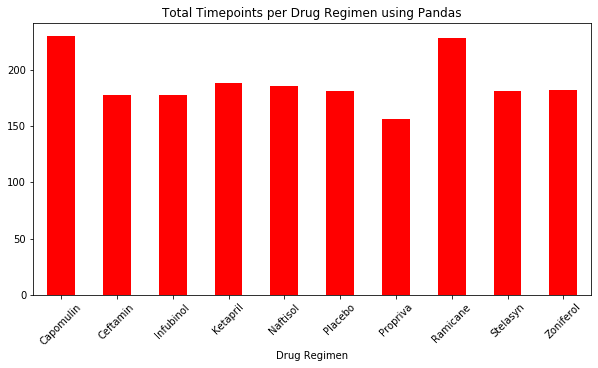

In [189]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugregimen_plot = merged_data_clean.groupby(["Drug Regimen"])
total_timepoints =drugregimen_plot ["Timepoint"].count()

time_plot_chart=total_timepoints.plot(kind="bar", figsize=(10,5), color="red",rot=45, 
                                    title="Total Timepoints per Drug Regimen using Pandas")



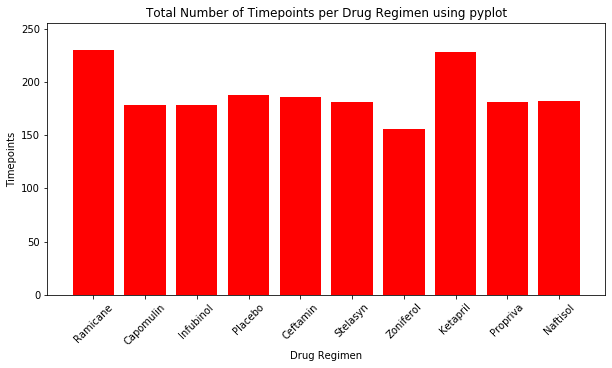

In [190]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimens = merged_data_clean ["Drug Regimen"].unique()
plt.figure(figsize=(10,5))
plt.bar(drug_regimens, total_timepoints, color="r", align="center")
plt.ylim(0, max(total_timepoints)+25)
plt.title("Total Number of Timepoints per Drug Regimen using pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xticks(rotation = 45)
plt.show()


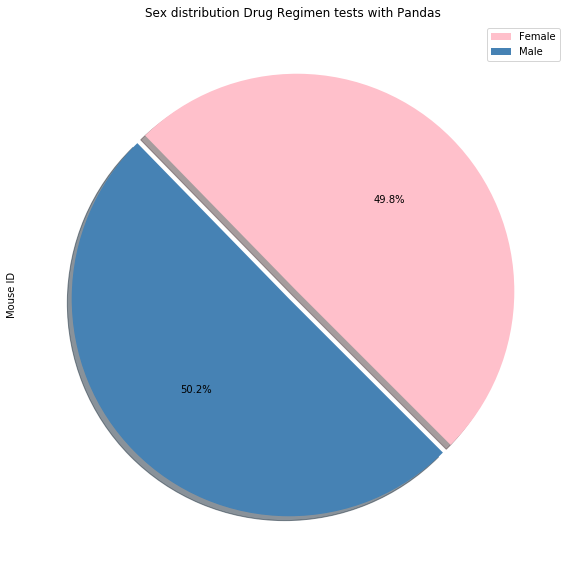

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_data= mouse_metadata.groupby(["Sex"]).count() ["Mouse ID"]

sex_pie = sex_data.plot(kind="pie",title="Sex distribution Drug Regimen tests with Pandas", figsize=(10,10),explode= [0.025, 0.025], radius=1, ax=None,labeldistance=None, 
            legend =True,frame=False, shadow=True, colors = ["pink", "steelblue"], startangle=-45, autopct="%1.1f%%")


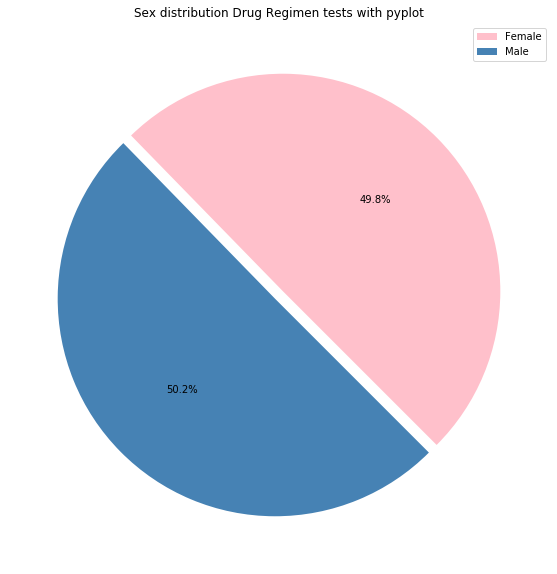

In [192]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,10))
plt.pie(sex_data, colors=("pink", "steelblue"),labels = ["",""],explode=[0.025,0.025],startangle=-45,autopct="%1.1f%%")
plt.title("Sex distribution Drug Regimen tests with pyplot")
plt.legend(["Female", "Male"])

## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
stats_data = merged_data_clean.copy()
mouse_tp_max = stats_data.groupby(["Mouse ID"]).max()
mouse_tp_max = mouse_tp_max.reset_index()
mouse_tp_max = mouse_tp_max[["Mouse ID", "Timepoint"]]

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
merged_max_tp = pd.merge(merged_data_clean, mouse_tp_max, on="Mouse ID", how="left")

# Rename Columns
merged_max_tp_full = merged_max_tp.rename({"Timepoint_x": "Timepoint", "Timepoint_y": "Last_Timepoint"}, axis="columns")

#  select only the latest timepoint as per mouse_tp_max
merged_max_tp = merged_max_tp_full.loc[(merged_max_tp_full["Timepoint"] == merged_max_tp_full["Last_Timepoint"])]

# select only for the regimens in list "Capomulin", "Ramicane", "Infubinol",  "Ceftamin"
sel_merged_max_tp = merged_max_tp.loc[merged_max_tp["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"])]
sel_merged_max_tp.sample(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Last_Timepoint
350,v923,Capomulin,Female,19,21,45,40.658124,2,45
94,j913,Ramicane,Female,4,17,45,31.560470,1,45
617,b759,Ceftamin,Female,12,25,30,55.742829,1,30
282,l897,Capomulin,Male,17,19,45,38.846876,1,45
1738,x226,Ceftamin,Male,23,28,0,45.000000,0,0


In [129]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the final tumour volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens. 
# Use the following substeps:

# Sub step 1  
                # Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
                # Merge this grouped DataFrame with the original cleaned DataFrame.
        # SEE Previous code cell
        
# sub step 2 
# Put treatments into a list for for loop (and later for plot labels)              
regimen_used = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
last_tumour_vol_sel = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
# regimen_data = sel_merged_max_tp.loc[sel_merged_max_tp["Drug Regimen"] == "Capomulin"]['Tumour Volume (mm3)']
for x in regimen_used:
        last_tumour_vol_sel.append(sel_merged_max_tp.loc[sel_merged_max_tp["Drug Regimen"] == x, ["Drug Regimen","Tumour Volume (mm3)"]])
        loop_data = sel_merged_max_tp.loc[sel_merged_max_tp["Drug Regimen"] == x ]['Tumour Volume (mm3)']
        loop_quartiles = loop_data.quantile([.25,.5,.75])
        loop_q25 = loop_quartiles[0.25]
        loop_q75 = loop_quartiles[0.75]
        loop_iqr = loop_q75 - loop_q25
        loop_lb = loop_q25 - (1.5 * loop_iqr)
        loop_ub = loop_q75 + (1.5 * loop_iqr)
        loop_out = loop_data.loc[(loop_data < loop_lb) | (loop_data > loop_ub)]
        print(f"For {x} the IQR is {loop_iqr}, the lower bound is {loop_lb} and the upper bound is {loop_ub}")
        for index, value in enumerate(loop_out):
                print(f"A total of {len(loop_out)} outlier(s) for {x} with a mm3 of {value}")
       
# create dataframes from list for calculations and plots
capomulin_vol =  pd.DataFrame(last_tumour_vol_sel[0]["Tumour Volume (mm3)"])
ramicane_vol = pd.DataFrame(last_tumour_vol_sel[1]["Tumour Volume (mm3)"])
infubinol_vol = pd.DataFrame(last_tumour_vol_sel[2]["Tumour Volume (mm3)"])
ceftamin_vol = pd.DataFrame(last_tumour_vol_sel[3]["Tumour Volume (mm3)"])

For Capomulin the IQR is 7.781863460000004, the lower bound is 20.70456164999999 and the upper bound is 51.83201549
For Ramicane the IQR is 9.098536719999998, the lower bound is 17.912664470000003 and the upper bound is 54.30681135
For Infubinol the IQR is 11.477135160000003, the lower bound is 36.83290494999999 and the upper bound is 82.74144559000001
A total of 1 outlier(s) for Infubinol with a mm3 of 36.321345799999996
For Ceftamin the IQR is 15.577752179999997, the lower bound is 25.355449580000002 and the upper bound is 87.66645829999999


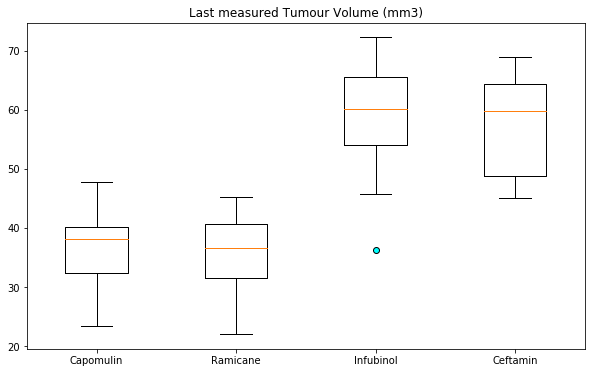

In [130]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
# Using Matplotlib, generate a box plot that shows the distribution of the final tumour volume for all the mice in each treatment group. 
# Highlight any potential outliers in the plot by changing their color and style.
# All four box plots should be within the same figure.
plt.rcParams["figure.figsize"] = [10, 6]
plt.boxplot([capomulin_vol["Tumour Volume (mm3)"], ramicane_vol["Tumour Volume (mm3)"], infubinol_vol["Tumour Volume (mm3)"], ceftamin_vol["Tumour Volume (mm3)"]],
                labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],
                flierprops={'markerfacecolor': 'cyan'})
plt.title("Last measured Tumour Volume (mm3)")
plt.show()
    

## Line and Scatter Plots

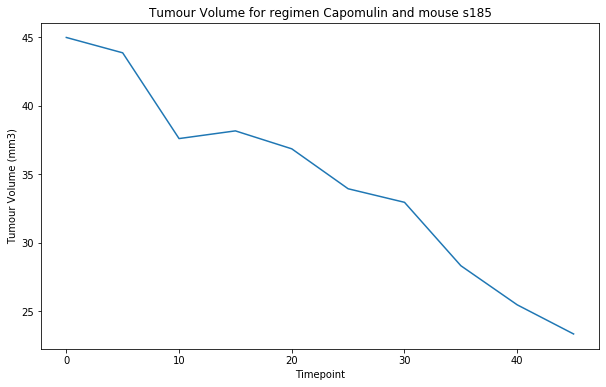

In [131]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

regimen_toplot = "Capomulin"
mouse_toplot = "s185"

lineplot_data_regimen = merged_data_clean.loc[(merged_data_clean["Drug Regimen"]== regimen_toplot)]
lineplot_data_mouse = lineplot_data_regimen.loc[(lineplot_data_regimen["Mouse ID"]== mouse_toplot)]
plt.plot(lineplot_data_mouse["Timepoint"], lineplot_data_mouse["Tumour Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.title(f"Tumour Volume for regimen {regimen_toplot} and mouse {mouse_toplot}")
plt.show()
    

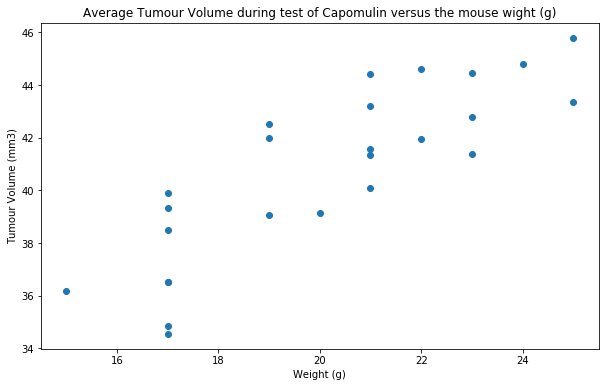

In [132]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
regimen_toscatter = "Capomulin"


scatterplot_data = merged_data_clean.loc[(merged_data_clean["Drug Regimen"]== regimen_toscatter)]
scatterplot_data = scatterplot_data.groupby(["Mouse ID"]).mean()
plt.scatter(scatterplot_data["Weight (g)"], scatterplot_data["Tumour Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")
plt.title(f"Average Tumour Volume during test of {regimen_toscatter} versus the mouse wight (g)")
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumour volume (mm3) is 0.84


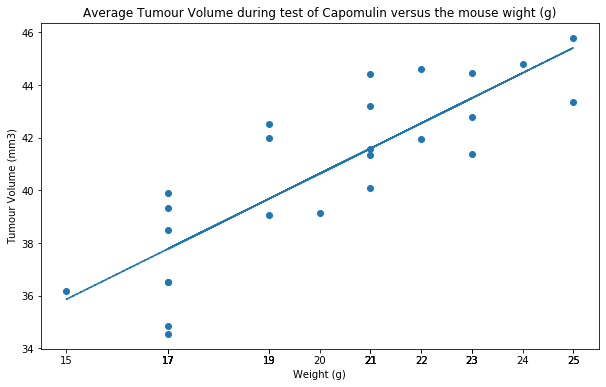

In [139]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
corr_weight = scatterplot_data["Weight (g)"]
corr_volume = scatterplot_data ["Tumour Volume (mm3)"]
print(f"The correlation coefficient between mouse weight and average tumour volume (mm3) is {round(st.pearsonr(corr_weight,corr_volume)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(corr_weight, corr_volume)
pe_fit = pe_slope * corr_weight + pe_int

plt.scatter(corr_weight,corr_volume)
plt.plot(corr_weight,pe_fit,"--")
plt.xticks(corr_weight)
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")
plt.title(f"Average Tumour Volume during test of {regimen_toscatter} versus the mouse wight (g)")
plt.show()